In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Create inspector and connect to engine
inspector = inspect(engine)

In [6]:
# Collect names of table within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Print column names and data type within the measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# print column names and data type within the station table
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [12]:
# Assign the station class to a variable called 'Station'
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13b64061a60>,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

In [15]:
# Query records in the station table
records = engine.execute("SELECT * FROM station")
for record in records:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Precipitation Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Find the most recent date in the data set.
recent_date= session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

In [17]:
# Last date in dataset
last_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
last_date

datetime.datetime(2017, 8, 23, 0, 0)

In [18]:
# Calculate the date one year from the last date in data set.
last_12_months = last_date - dt.timedelta(days=365)
last_12_months

datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12_months).\
    filter(Measurement.date <= last_date).all()
year_prcp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [20]:
 # Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
prcp_df= prcp_df.set_index('Date')
date_sorted = prcp_df.sort_values(by='Date').dropna()
date_sorted.head()



,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


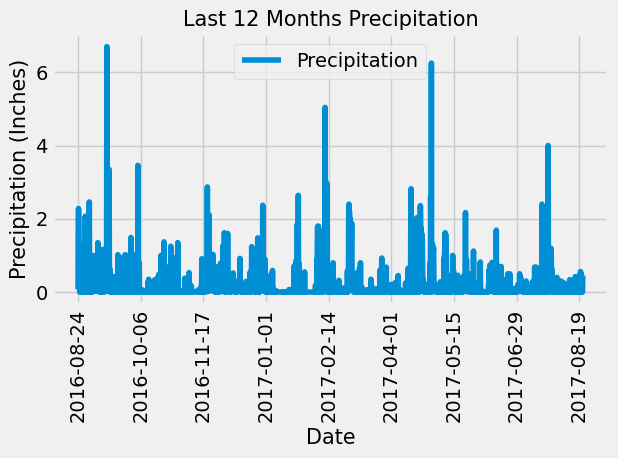

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
date_sorted.plot(rot=90)
plt.title("Last 12 Months Precipitation", fontsize="15")
plt.xlabel("Date", size= 15)
plt.ylabel("Precipitation (Inches)", size=15)
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_sorted.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station).count()
total_station

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sts_activity =session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
sts_activity

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive_sts = sts_activity[0][0]

tem = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

mostactive_sts_tobs = session.query(*tem).filter(Measurement.station==mostactive_sts).all()
mostactive_sts_tobs

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12month_mostactive_sts_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >=last_12_months).\
    filter(Measurement.date <= last_date). filter(Measurement.station==mostactive_sts).all()

last12month_mostactive_sts_tobs

In [ ]:
# Create a dataseries for the result
one_yeartobs = pd.DataFrame(last12month_mostactive_sts_tobs)
one_yeartobs.plot.hist(bins=12)
plt.title("Most Active Station Temperature Observation", size=12)
plt.xlabel("Temperature")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()